In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from scipy import integrate

In [2]:
def f(x,y,z):
    fx = lambda o: (x-0.5*np.cos(o))/(x**2+y**2+z**2+0.5**2-x*np.cos(o)-y*np.sin(o))**(3/2)
    fy = lambda o: (y-0.5*np.sin(o))/(x**2+y**2+z**2+0.5**2-x*np.cos(o)-y*np.sin(o))**(3/2)
    fz = lambda o: (z)/(x**2+y**2+z**2+0.5**2-x*np.cos(o)-y*np.sin(o))**(3/2)
    return fx,fy,fz

In [58]:
r,w =np.polynomial.legendre.leggauss(20)
r

array([-0.9931286 , -0.96397193, -0.91223443, -0.83911697, -0.74633191,
       -0.63605368, -0.510867  , -0.37370609, -0.22778585, -0.07652652,
        0.07652652,  0.22778585,  0.37370609,  0.510867  ,  0.63605368,
        0.74633191,  0.83911697,  0.91223443,  0.96397193,  0.9931286 ])

In [59]:
fx,fy,fz = f(0.6,0.6,1.)

In [60]:
def f_eval(x,y,z):
    fx,fy,fz = f(x,y,z)
    fx_eval = fx(1/2*(r*2*np.pi+2*np.pi))
    fy_eval = fy(1/2*(r*2*np.pi+2*np.pi))
    fz_eval = fz(1/2*(r*2*np.pi+2*np.pi))
    return fx_eval,fy_eval,fz_eval

In [61]:
def integrar(x,y,z):
    
    fx_eval,fy_eval,fz_eval = f_eval(x,y,z)
    
    Ix = 2*np.pi*(np.sum(fx_eval*w))/2
    Iy = 2*np.pi*(np.sum(fy_eval*w))/2
    Iz = 2*np.pi*(np.sum(fz_eval*w))/2

    Ix = Ix/(2*np.pi)
    Iy = Iy/(2*np.pi)
    Iz = Iz/(2*np.pi)
    
    return Ix,Iy,Iz

print(integrar(0.6,0.6,1.))

(0.2115249407672453, 0.2115249406881854, 0.4386473215993913)


In [62]:
N = 6

x=np.linspace(-0.6,0.6,N)
y=np.linspace(-0.6,0.6,N)
z=np.linspace(-0.6,0.6,N)

In [63]:
campo = np.zeros((N,3))

for i in range(N):
    campo[i] = integrar(x[i],y[i],z[i])
    
campo

array([[-0.44648399, -0.44648787, -0.640944  ],
       [-0.61225716, -0.6132804 , -1.84038871],
       [ 0.39558719,  0.39558098, -1.11063647],
       [-0.3955743 , -0.39557451,  1.110634  ],
       [ 0.6129211 ,  0.61297439,  1.83951154],
       [ 0.44648529,  0.44648525,  0.6409377 ]])

In [64]:
Ex = np.zeros((N,N,N))
Ey = np.zeros((N,N,N))
Ez = np.zeros((N,N,N))            

In [65]:
def aro():
    Aro = np.zeros((360,3))
    circum = np.linspace(0,2*np.pi,360)
    for i in range(len(circum)):
        Aro[i][0] = 0.5*np.cos(circum[i])
        Aro[i][1] = 0.5*np.sin(circum[i])
        
    return Aro[:,0],Aro[:,1],Aro[:,2]

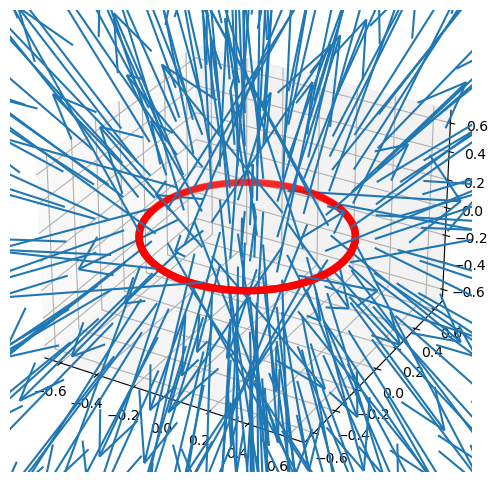

In [66]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111,projection='3d')

for i in range(N):
    for j in range(N):
        for k in range(N):
            campo = integrar(x[i],y[j],z[k])
            Ex[i,j,k] = campo[0]
            Ey[i,j,k] = campo[1]
            Ez[i,j,k] = campo[2]
            ax.quiver(x[i],y[j],z[k],Ex[i,j,k],Ey[i,j,k],Ez[i,j,k])
            
Ax,Ay,Az = aro()         
ax.scatter(Ax,Ay,Az, color = "red")

In [70]:
print(Ex[:,:,-1])

[[-0.44648399 -0.53804766 -0.57663019 -0.57663019 -0.53804766 -0.44648399]
 [-0.32282923 -0.35778866 -0.34807311 -0.34807311 -0.35778866 -0.32282923]
 [-0.1153234  -0.11602457 -0.1022882  -0.1022882  -0.11602457 -0.1153234 ]
 [ 0.11532689  0.11602458  0.1022882   0.1022882   0.11602458  0.11532689]
 [ 0.32282643  0.35779054  0.34807361  0.34807361  0.35779054  0.32282643]
 [ 0.44648529  0.53804445  0.57663105  0.57663105  0.53804445  0.44648529]]


In [69]:
print(Ey[:,:,-1])

[[-0.44648787 -0.32282322 -0.1153198   0.1153198   0.32282322  0.44648787]
 [-0.53804364 -0.35779018 -0.11602488  0.11602488  0.35779018  0.53804364]
 [-0.57663174 -0.34807343 -0.1022882   0.1022882   0.34807343  0.57663174]
 [-0.57663068 -0.34807359 -0.1022882   0.1022882   0.34807359  0.57663068]
 [-0.53804455 -0.35779049 -0.11602454  0.11602454  0.35779049  0.53804455]
 [-0.44648525 -0.32282666 -0.11532621  0.11532621  0.32282666  0.44648525]]
